In [32]:
total_ = []


def total_gc_content(sequence):
    """
    Calculate the GC content of a DNA sequence.
    """
    g = sequence.count("G")
    c = sequence.count("C")
    sum = g + c
    return sum


def annotate_gc_regions(gc_values, threshold_high=60, threshold_low=40):
    """
    Annotate regions with high and low GC content.
    """
    high_gc_regions = [i for i, gc in enumerate(gc_values) if gc > threshold_high]
    low_gc_regions = [i for i, gc in enumerate(gc_values) if gc < threshold_low]

    return high_gc_regions, low_gc_regions

def plot_annotated_gc_content(gc_values, window_size, high_gc_regions, low_gc_regions):
    """
    Plot GC content with annotated high and low GC regions.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(gc_values, marker="o", linestyle="-", color="blue", label="GC Content (%)")
    plt.title(f"GC Content Across Genome (Window Size: {window_size})")
    plt.xlabel("Window Position")
    plt.ylabel("GC Content (%)")

    # Highlight high GC regions
    for region in high_gc_regions:
        plt.axvspan(region - 0.5, region + 0.5, color="red", alpha=0.3, label="High GC Region")

    # Highlight low GC regions
    for region in low_gc_regions:
        plt.axvspan(region - 0.5, region + 0.5, color="green", alpha=0.3, label="Low GC Region")

    plt.legend()
    plt.grid()
    plt.savefig("annotated_gc_content_plot.png")
    plt.show()

# Example usage with the GC content analysis
#gc_values = [45, 55, 65, 35, 60, 40]  # Example data


[104, 115, 97, 116, 110, 110, 113, 102, 99, 105, 99, 107, 107, 106, 113, 109, 124, 105, 109, 105, 100, 115, 112, 104, 82, 102, 113, 92, 88, 101, 114, 94, 106, 100, 110, 114, 113, 117, 91, 93, 98, 104, 105, 102, 99, 96, 121, 103, 103, 107, 101, 95, 115, 102, 96, 82, 90, 103, 72, 89, 112, 93, 103, 103, 103, 107, 107, 102, 107, 85, 100, 114, 112, 118, 114, 112, 99, 94, 95, 107, 111, 118, 97, 102, 75, 82, 84, 101, 102, 105, 111, 102, 92, 95, 105, 96, 93, 87, 80, 64, 68, 78, 73, 89, 83, 75, 76, 75, 75, 55, 65, 67, 58, 59, 68, 56, 58, 53, 75, 99, 90, 97, 102, 113, 98, 117, 101, 101, 97, 117, 108, 110, 125, 114, 116, 103, 110, 106, 114, 113, 111, 109, 108, 107, 106, 109, 109, 103, 116, 112, 115, 94, 122, 113, 102, 115, 98, 121, 104, 99, 112, 54, 80, 88, 92, 112, 110, 115, 112, 96, 121, 115, 100, 111, 107, 117, 115, 111, 107, 119, 115, 109, 118, 123, 108, 89, 72, 92, 100, 105, 114, 115, 109, 126, 110, 91, 76, 89, 103, 108, 119, 111, 103, 98, 99, 101, 100, 104, 113, 100, 109, 120, 103, 111, 95,

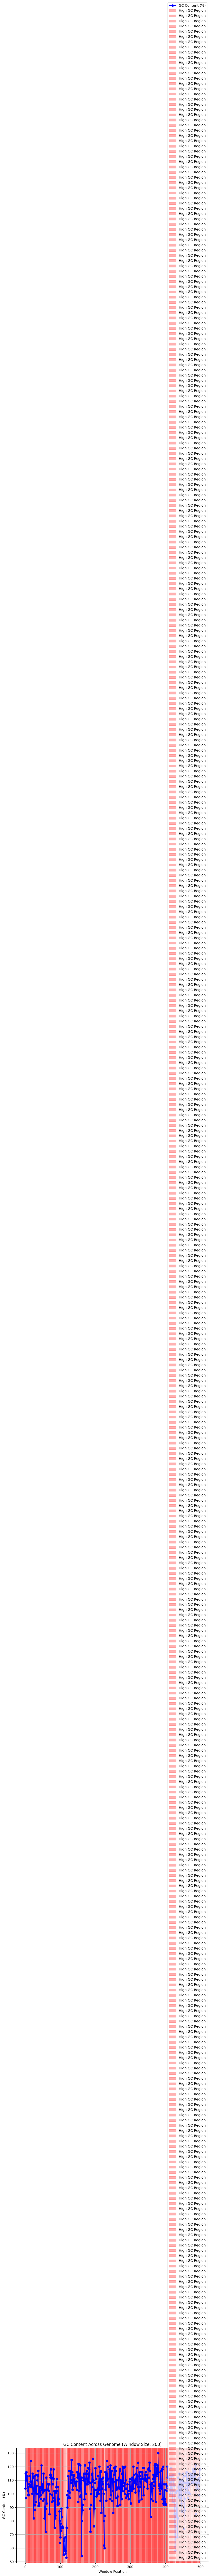

Processing Sequence ID: AP022815.1
Overall GC Content: 50.76%


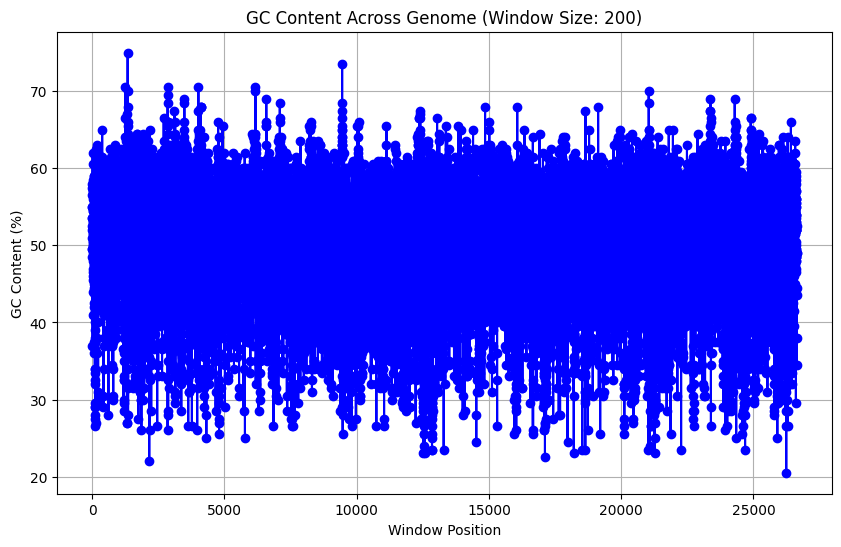

[74, 104, 115, 97, 116, 110, 110, 113, 102, 99, 105, 99, 107, 107, 106, 113, 109, 124, 105, 109, 105, 100, 115, 112, 104, 82, 102, 113, 92, 88, 101, 114, 94, 106, 100, 110, 114, 113, 117, 91, 93, 98, 104, 105, 102, 99, 96, 121, 103, 103, 107, 101, 95, 115, 102, 96, 82, 90, 103, 72, 89, 112, 93, 103, 103, 103, 107, 107, 102, 107, 85, 100, 114, 112, 118, 114, 112, 99, 94, 95, 107, 111, 118, 97, 102, 75, 82, 84, 101, 102, 105, 111, 102, 92, 95, 105, 96, 93, 87, 80, 64, 68, 78, 73, 89, 83, 75, 76, 75, 75, 55, 65, 67, 58, 59, 68, 56, 58, 53, 75, 99, 90, 97, 102, 113, 98, 117, 101, 101, 97, 117, 108, 110, 125, 114, 116, 103, 110, 106, 114, 113, 111, 109, 108, 107, 106, 109, 109, 103, 116, 112, 115, 94, 122, 113, 102, 115, 98, 121, 104, 99, 112, 54, 80, 88, 92, 112, 110, 115, 112, 96, 121, 115, 100, 111, 107, 117, 115, 111, 107, 119, 115, 109, 118, 123, 108, 89, 72, 92, 100, 105, 114, 115, 109, 126, 110, 91, 76, 89, 103, 108, 119, 111, 103, 98, 99, 101, 100, 104, 113, 100, 109, 120, 103, 111,

In [39]:
from Bio import SeqIO
import matplotlib.pyplot as plt


def calculate_gc_content(sequence):
    """
    Calculate the GC content of a DNA sequence.
    """
    g = sequence.count("G")
    c = sequence.count("C")
    return (g + c) / len(sequence) * 100

def gc_content_sliding_window(sequence, window_size=100):
    """
    Calculate GC content in sliding windows across the sequence.
    """
    gc_content = []
    for i in range(0, len(sequence) - window_size + 1, window_size):
        window = sequence[i:i + window_size]
        gc = calculate_gc_content(window)
        gc_content.append(gc)
        sum=total_gc_content(window)
        total_.append(sum)
    return gc_content

def plot_gc_content(gc_values, window_size):
    """
    Plot GC content across the sequence.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(gc_values, marker="o", linestyle="-", color="blue")
    plt.title(f"GC Content Across Genome (Window Size: {window_size})")
    plt.xlabel("Window Position")
    plt.ylabel("GC Content (%)")
    plt.grid()
    plt.savefig("gc_content_plot.png")
    plt.show()

# Main function to process a FASTA file
def process_fasta(file_path, window_size=100):
    """
    Process a FASTA file to calculate and visualize GC content.
    """
    for record in SeqIO.parse(file_path, "fasta"):
        print(f"Processing Sequence ID: {record.id}")

        # Sequence data
        sequence = str(record.seq)


        # Calculate overall GC content
        overall_gc = calculate_gc_content(sequence)
        print(f"Overall GC Content: {overall_gc:.2f}%")

        # Calculate GC content in sliding windows
        gc_values = gc_content_sliding_window(sequence, window_size)

        # Plot GC content
        plot_gc_content(gc_values, window_size)



print(total_[1:500])

high_regions, low_regions = annotate_gc_regions(total_[1:500])

plot_annotated_gc_content(total_[1:500], window_size=200, high_gc_regions=high_regions, low_gc_regions=low_regions)

# Example usage
fasta_file = "/content/sequence (3).fasta"  # Replace with your FASTA file path
process_fasta(fasta_file, window_size=200)

print(total_)





In [2]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.9 MB/s eta 0:00:00
